In [2]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Drops specific values in a dataframe
# if flag = 1, drops values less than 'val'
# if flag = 0, drops values greater than 'val'
def drop_values(dataframe, column, val, flag):
    if flag:
        return dataframe.drop(dataframe[column < val].index)
    else:
        return dataframe.drop(dataframe[column > val].index)

In [15]:
egg_1 = pd.read_pickle('RAW_DATA_HOURLY/Egg#1_06Jun2020_hourly.pkl')
egg_2 = pd.read_pickle('RAW_DATA_HOURLY/Egg#2_06Jun2020_hourly.pkl')
egg_4 = pd.read_pickle('RAW_DATA_HOURLY/Egg#4_06Jun2020_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_06Jun2020_hourly.pkl')

In [16]:
egg_1

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,20.520000,20.116667,3.166667,3.666667,4.000000,142.300000,1.421641,1935.236667,1.410120,99261.900000
2020-05-06 14:00:00,17.968333,24.757292,13.868750,15.925000,16.810417,63.958958,1.423080,263.038333,1.422146,99264.718750
2020-05-06 15:00:00,22.348833,19.432667,1.673333,2.333333,2.475000,60.012667,1.423583,95.994500,1.423568,99188.643333
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000
...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,17.769333,56.769000,4.976667,6.965000,7.448333,42.764333,1.423516,45.984500,1.423708,99397.595000
2020-06-02 10:00:00,18.665833,55.354500,12.606667,18.260000,20.106667,44.410500,1.423566,60.210000,1.423650,99301.313333
2020-06-02 11:00:00,22.390833,46.859167,4.021667,5.456667,5.803333,43.110333,1.423955,70.113000,1.423761,99201.498333


In [17]:
egg_2

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,21.180000,23.270000,1.000000,1.500000,1.500000,132.520000,1.424859,2664.450000,1.397469,99291.800000
2020-05-06 14:00:00,18.300385,24.459423,1.203846,2.282692,2.573077,57.853654,1.426289,380.277692,1.414856,99296.513462
2020-05-06 15:00:00,21.573667,19.899667,1.035000,1.966667,2.193333,49.278667,1.426699,166.483333,1.416678,99223.611667
2020-05-06 16:00:00,20.936500,19.845833,1.188333,2.235000,2.576667,50.088667,1.426638,159.735500,1.416693,99177.978333
2020-05-06 17:00:00,20.838500,19.497333,1.536667,2.705000,3.088333,49.248667,1.426650,146.279333,1.416790,99149.185000
...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.382167,54.982833,4.668333,6.990000,7.683333,49.023000,1.426488,88.980500,1.417085,99420.093333
2020-06-02 10:00:00,19.135000,53.975500,9.786667,15.533333,17.430000,50.406167,1.426509,88.263833,1.417135,99319.851667
2020-06-02 11:00:00,22.748000,45.981500,3.601667,5.361667,5.930000,49.626000,1.426785,81.485500,1.417416,99221.360000


In [18]:
egg_4

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,18.270000,25.340000,0.500000,1.500000,1.500000,152.030000,1.420438,3120.730000,1.408406,99240.700000
2020-05-06 14:00:00,17.968654,24.770577,1.019231,1.713462,1.861538,53.433654,1.422308,420.575385,1.424035,99233.907692
2020-05-06 15:00:00,22.392167,19.515833,0.860000,1.491667,1.601667,47.171833,1.422770,214.009333,1.425345,99153.841667
2020-05-06 16:00:00,22.319833,18.850500,1.110000,1.770000,1.896667,46.779333,1.422770,189.641833,1.425485,99105.393333
2020-05-06 17:00:00,22.198833,18.444833,1.400000,2.188333,2.283333,47.520667,1.422746,161.216000,1.425648,99076.631667
...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.609000,54.125167,4.305000,6.036667,6.333333,37.938333,1.422662,83.741000,1.426006,99369.563333
2020-06-02 10:00:00,19.366167,53.185500,8.951667,13.168333,13.881667,39.776500,1.422683,80.696167,1.426044,99273.486667
2020-06-02 11:00:00,22.860000,45.743667,3.448333,4.746667,4.925000,36.679500,1.423012,71.437333,1.426201,99170.375000


In [19]:
airpointer

,NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,
2020-05-06 13:00:00,1.405500,3.092333,4.498500,39.439667,14.807833,10.762833,4.045167,12.164500,29.069333
2020-05-06 14:00:00,1.235167,2.711000,3.915167,40.489167,12.815500,8.869667,3.944333,12.281333,28.194667
2020-05-06 15:00:00,1.483333,3.901500,5.595000,40.472333,15.562333,11.270000,4.290667,12.369500,27.624167
2020-05-06 16:00:00,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,1.871583,12.394950,14.266483,35.526850,24.393067,14.080850,10.313250,991.866117,14.362150
2020-06-02 10:00:00,2.176050,7.480200,9.656100,44.714200,19.079400,13.009233,6.067050,991.048683,16.280417
2020-06-02 11:00:00,2.018567,6.709750,8.636333,48.688017,20.483817,13.730200,6.751233,990.149050,18.828600


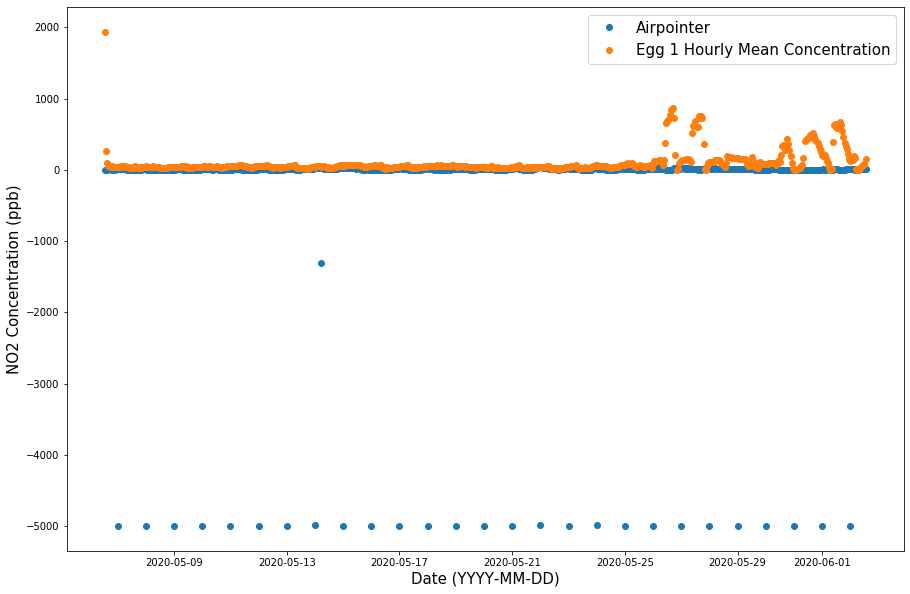

In [20]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(airpointer.index.to_series(), airpointer['NO2'], 'o', label='Airpointer')
plt.plot(egg_1.index.to_series(), egg_1['NO2[ppb]'], 'o',label="Egg 1 Hourly Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [25]:
egg_1['Airpointer_NO2[ppb]'] = airpointer['NO2']
# Remove target values less than -1
egg_1 = egg_1.drop(egg_1[egg_1['Airpointer_NO2[ppb]'] < -1].index)
egg_1

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 13:00:00,20.520000,20.116667,3.166667,3.666667,4.000000,142.300000,1.421641,1935.236667,1.410120,99261.900000,3.092333
2020-05-06 14:00:00,17.968333,24.757292,13.868750,15.925000,16.810417,63.958958,1.423080,263.038333,1.422146,99264.718750,2.711000
2020-05-06 15:00:00,22.348833,19.432667,1.673333,2.333333,2.475000,60.012667,1.423583,95.994500,1.423568,99188.643333,3.901500
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333,5.137333
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000,7.393667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,17.769333,56.769000,4.976667,6.965000,7.448333,42.764333,1.423516,45.984500,1.423708,99397.595000,12.394950
2020-06-02 10:00:00,18.665833,55.354500,12.606667,18.260000,20.106667,44.410500,1.423566,60.210000,1.423650,99301.313333,7.480200
2020-06-02 11:00:00,22.390833,46.859167,4.021667,5.456667,5.803333,43.110333,1.423955,70.113000,1.423761,99201.498333,6.709750


In [26]:
egg_1.to_pickle('RAW_DATA_HOURLY_WITH_TARGET/Egg#1_06Jun2020_hourly.pkl')

In [28]:
egg_1 = pd.read_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/Egg#1_06Jun2020_hourly.pkl')

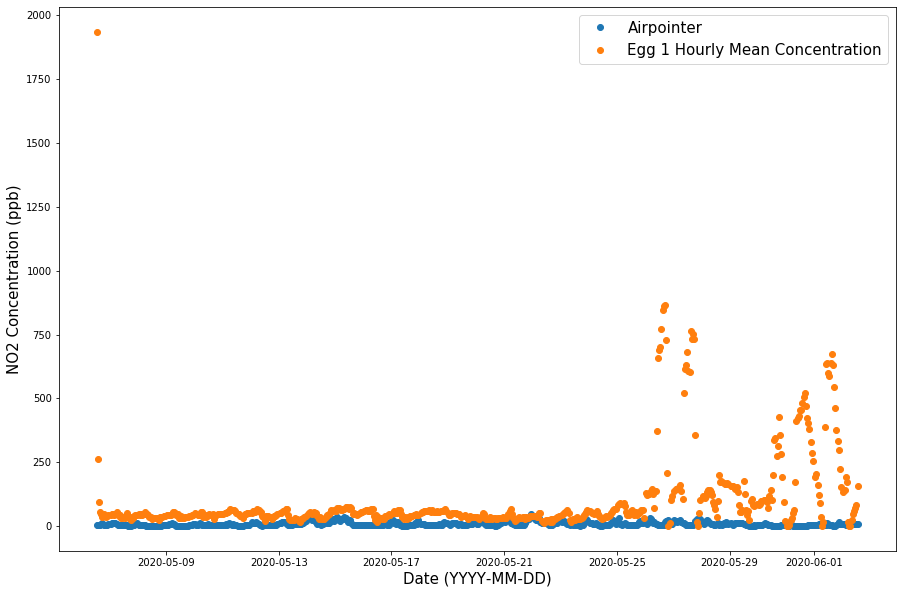

In [29]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_1.index.to_series(), egg_1['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_1.index.to_series(), egg_1['NO2[ppb]'], 'o',label="Egg 1 Hourly Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [30]:
egg_2['Airpointer_NO2[ppb]'] = airpointer['NO2']
# Remove target values less than -1
egg_2 = egg_2.drop(egg_2[egg_2['Airpointer_NO2[ppb]'] < -1].index)
egg_2.to_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/Egg#2_06Jun2020_hourly.pkl')

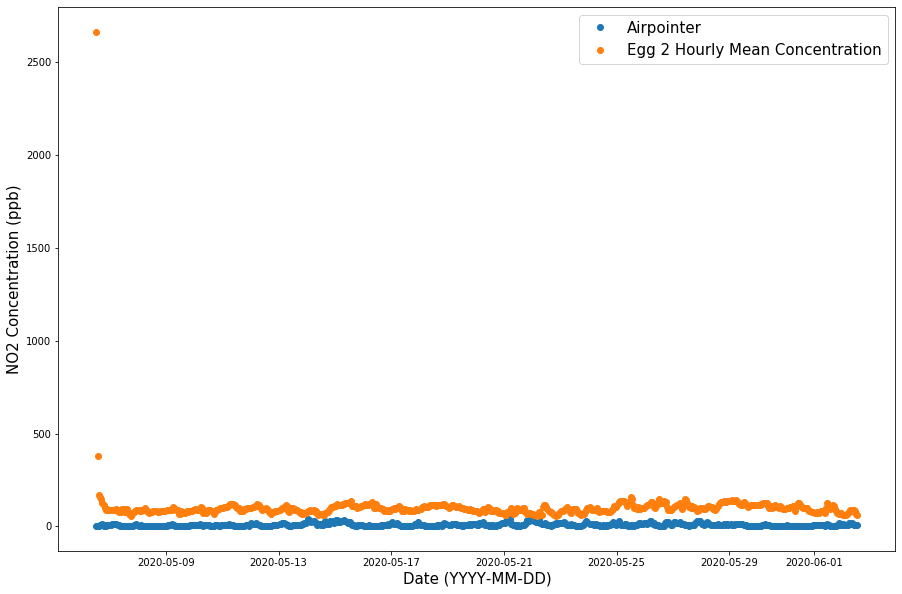

In [31]:
egg_2 = pd.read_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/Egg#2_06Jun2020_hourly.pkl')
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_2.index.to_series(), egg_2['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_2.index.to_series(), egg_2['NO2[ppb]'], 'o',label="Egg 2 Hourly Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [33]:
egg_4['Airpointer_NO2[ppb]'] = airpointer['NO2']
# Remove target values less than -1
egg_4 = egg_4.drop(egg_4[egg_4['Airpointer_NO2[ppb]'] < -1].index)
egg_4.to_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/Egg#4_06Jun2020_hourly.pkl')

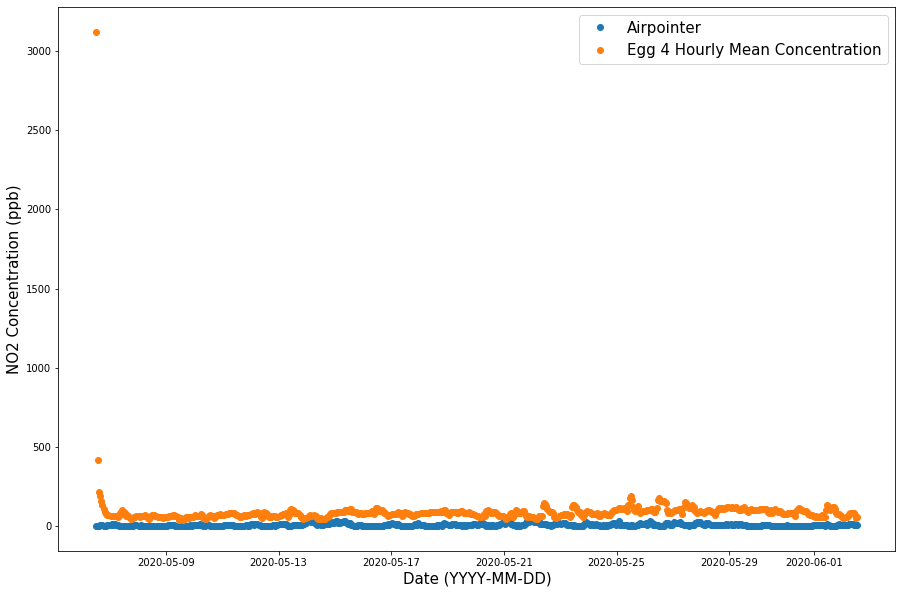

In [34]:
egg_4 = pd.read_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/Egg#4_06Jun2020_hourly.pkl')
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_4.index.to_series(), egg_4['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_4.index.to_series(), egg_4['NO2[ppb]'], 'o',label="Egg 4 Hourly Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [37]:
egg_4 = egg_4[(np.abs(stats.zscore(egg_4)) < 3).all(axis=1)]
egg_4

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 18:00:00,19.406167,20.388167,1.708333,2.600000,2.696667,48.284000,1.422525,132.534833,1.425743,99090.321667,10.763833
2020-05-06 19:00:00,16.153333,24.047833,2.116667,3.106667,3.255000,46.445167,1.422319,110.690000,1.425784,99125.925000,3.808167
2020-05-06 20:00:00,14.565833,23.106500,0.821667,1.178333,1.246667,43.417667,1.422257,87.185667,1.425876,99185.425000,4.448667
2020-05-06 21:00:00,12.986167,24.581333,0.710000,1.103333,1.211667,43.173333,1.422144,76.006667,1.425898,99219.238333,4.096667
2020-05-06 22:00:00,11.887167,25.715333,0.533333,0.993333,1.046667,43.346500,1.422083,73.301333,1.425900,99214.601667,4.881833
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.609000,54.125167,4.305000,6.036667,6.333333,37.938333,1.422662,83.741000,1.426006,99369.563333,12.394950
2020-06-02 10:00:00,19.366167,53.185500,8.951667,13.168333,13.881667,39.776500,1.422683,80.696167,1.426044,99273.486667,7.480200
2020-06-02 11:00:00,22.860000,45.743667,3.448333,4.746667,4.925000,36.679500,1.423012,71.437333,1.426201,99170.375000,6.709750


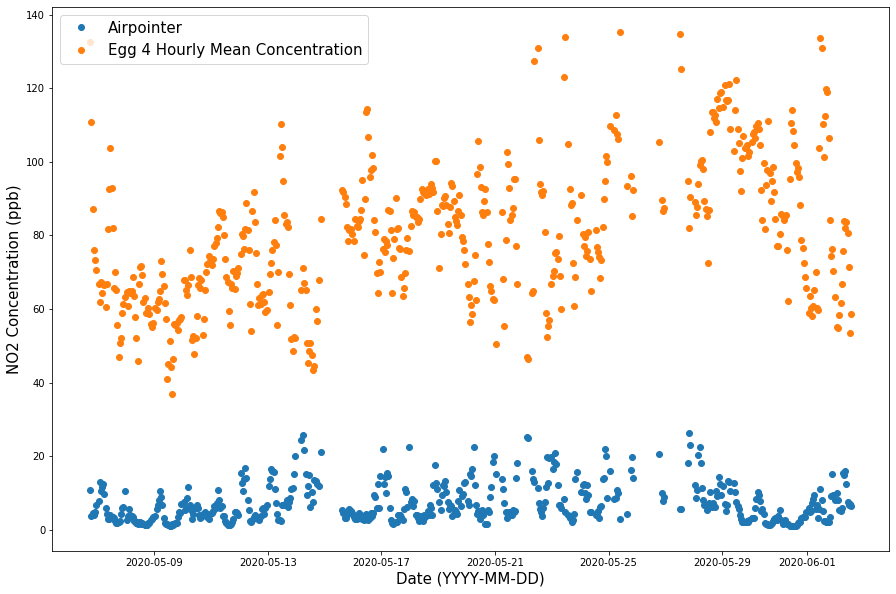

In [38]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_4.index.to_series(), egg_4['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_4.index.to_series(), egg_4['NO2[ppb]'], 'o',label="Egg 4 Hourly Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

0.0009678664734981135

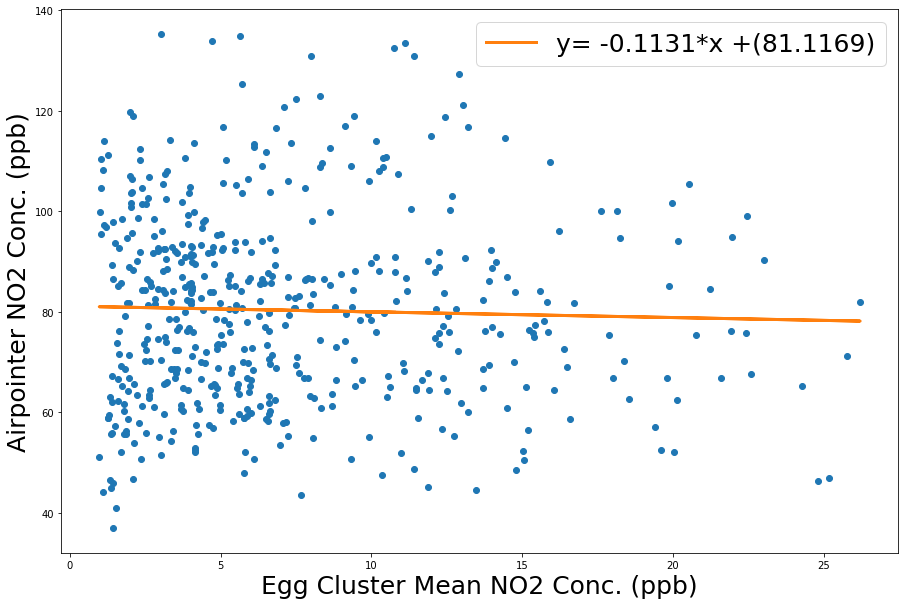

In [40]:
# Calculate a regression line
xValues = egg_4['Airpointer_NO2[ppb]'].to_numpy()
yValues = egg_4['NO2[ppb]'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [42]:
# ------------------------ ALL OF THE MODEL'S PARAMETERS ------------------------
# Sensor measurements from the cluster
cluster_temp_inside_box = egg_4['Temperature[degC]'].to_numpy().reshape(-1,1)
cluster_humidity = egg_4['Humidity[percent]'].to_numpy().reshape(-1,1)
cluster_pm_1 = egg_4['PM1.0[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_pm_25 = egg_4['PM2.5[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_pm_10 = egg_4['PM10.0[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_O3_conc = egg_4['O3[ppb]'].to_numpy().reshape(-1,1)
cluster_O3_vol = egg_4['O3[V]'].to_numpy().reshape(-1,1)
cluster_NO2_conc = egg_4['NO2[ppb]'].to_numpy().reshape(-1,1)
cluster_NO2_vol = egg_4['NO2[V]'].to_numpy().reshape(-1,1)
cluster_pressure = egg_4['Pressure[Pa]'].to_numpy().reshape(-1,1)
# Airpointer measurements
# airpointer_NO = dataframe['NO'].to_numpy().reshape(-1,1)
airpointer_NO2 = egg_4['Airpointer_NO2[ppb]'].to_numpy().reshape(-1,1)
# airpointer_NOx = dataframe['NOx'].to_numpy().reshape(-1,1)
# airpointer_O3 = dataframe['O3'].to_numpy().reshape(-1,1)
# airpointer_pm10_conc = dataframe['PM10_conc'].to_numpy().reshape(-1,1)
# airpointer_pm10_25 = dataframe['PM10-2.5_conc'].to_numpy().reshape(-1,1)
# airpointer_pm25 = dataframe['PM2.5_conc'].to_numpy().reshape(-1,1)
# airpointer_air_temperature = dataframe['Air_Temperature'].to_numpy().reshape(-1,1)
# airpointer_relative_humidity = dataframe['Relative_Humidity'].to_numpy().reshape(-1,1)

# Build the DATA matrix
DATA = np.concatenate((cluster_temp_inside_box, 
                       cluster_humidity, 
                       cluster_pm_1, 
                       cluster_pm_25, 
                       cluster_pm_10,
                       cluster_O3_conc,
                       cluster_O3_vol,
#                        cluster_NO2_conc,
#                        cluster_NO2_vol,
                       cluster_pressure),
#                        airpointer_NO,
#                        airpointer_NOx,
#                        airpointer_O3,
#                        airpointer_pm10_conc,
#                        airpointer_pm10_25,
#                        airpointer_pm25,
#                        airpointer_air_temperature,
#                        airpointer_relative_humidity), 
                       axis=1)
# The target vector
target = airpointer_NO2

In [43]:
# Split the data into training and test sets
DATA_train, DATA_test, target_train, target_test = train_test_split(DATA, target, random_state=0)
# Simple Linear Regression method
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(elastic_net.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(elastic_net.score(DATA_test, target_test)))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, elastic_net.predict(DATA))))
print('Estimator feature strengths: {}'.format(elastic_net.coef_))

Training set score: 0.367814
Test set score: 0.295727
MAE: 3.2004
Estimator feature strengths: [-7.87169189e-02 -6.50820791e-03  2.83778249e+00 -1.18880656e+01
  1.02867221e+01 -5.39222722e-02  0.00000000e+00  1.81698622e-03]


0.3552435900794525

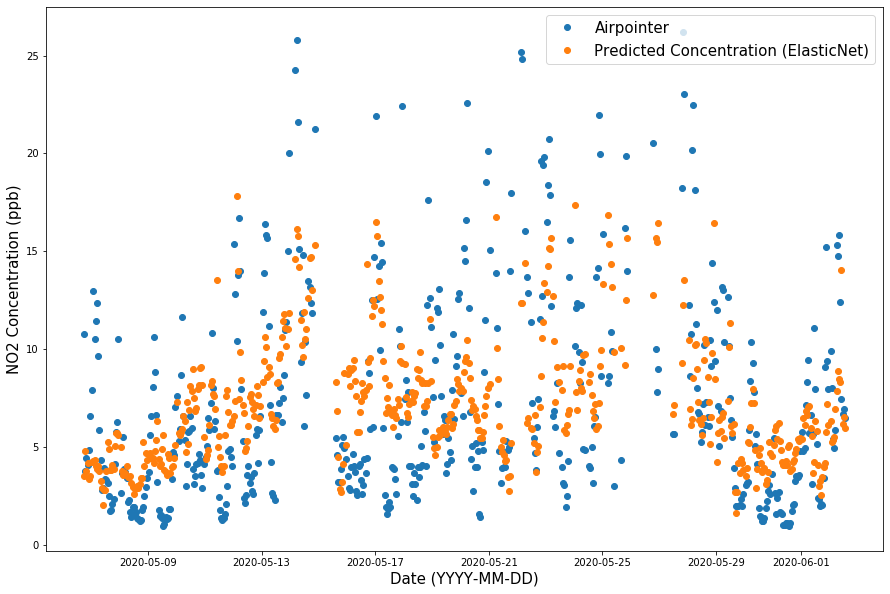

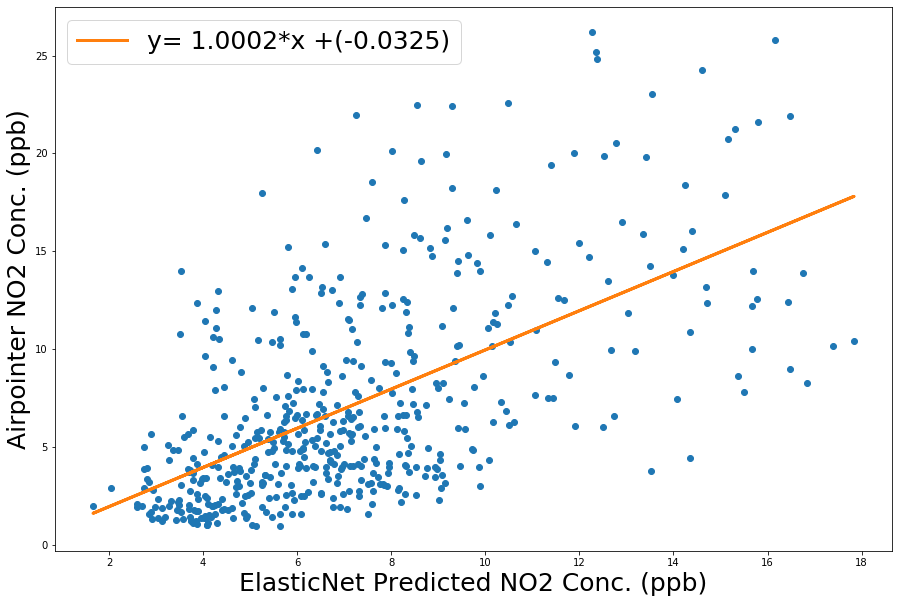

In [44]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_4.index.to_series(), egg_4['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_4.index.to_series(), elastic_net.predict(DATA), 'o',label="Predicted Concentration (ElasticNet)")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(DATA).reshape(-1,1)
yValues = target
linear_regression = LinearRegression().fit(xValues, yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0][0], linear_regression.intercept_[0]),
         linewidth=3)
plt.xlabel('ElasticNet Predicted NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [48]:
egg_1 = pd.read_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/Egg#1_06Jun2020_hourly.pkl')
egg_2 = pd.read_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/Egg#2_06Jun2020_hourly.pkl')
egg_4 = pd.read_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/Egg#4_06Jun2020_hourly.pkl')
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_06Jun2020_hourly.pkl')

In [47]:
sensor_cluster = pd.concat((egg_1, egg_2, egg_4))
sensor_cluster = sensor_cluster.groupby(sensor_cluster.index).mean()
sensor_cluster

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 13:00:00,19.990000,22.908889,1.555556,2.222222,2.333333,142.283333,1.422313,2573.472222,1.405332,99264.800000,3.092333
2020-05-06 14:00:00,18.079124,24.662431,5.363942,6.640385,7.081677,58.415422,1.423892,354.630470,1.420346,99265.046635,2.711000
2020-05-06 15:00:00,22.104889,19.616056,1.189444,1.930556,2.090000,52.154389,1.424351,158.829056,1.421864,99188.698889,3.901500
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000,5.137333
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556,7.393667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.253500,55.292333,4.650000,6.663889,7.155000,43.241889,1.424222,72.902000,1.422267,99395.750556,12.394950
2020-06-02 10:00:00,19.055667,54.171833,10.448333,15.653889,17.139444,44.864389,1.424253,76.390000,1.422276,99298.217222,7.480200
2020-06-02 11:00:00,22.666278,46.194778,3.690556,5.188333,5.552778,43.138611,1.424584,74.345278,1.422459,99197.744444,6.709750


0.005947002941617652

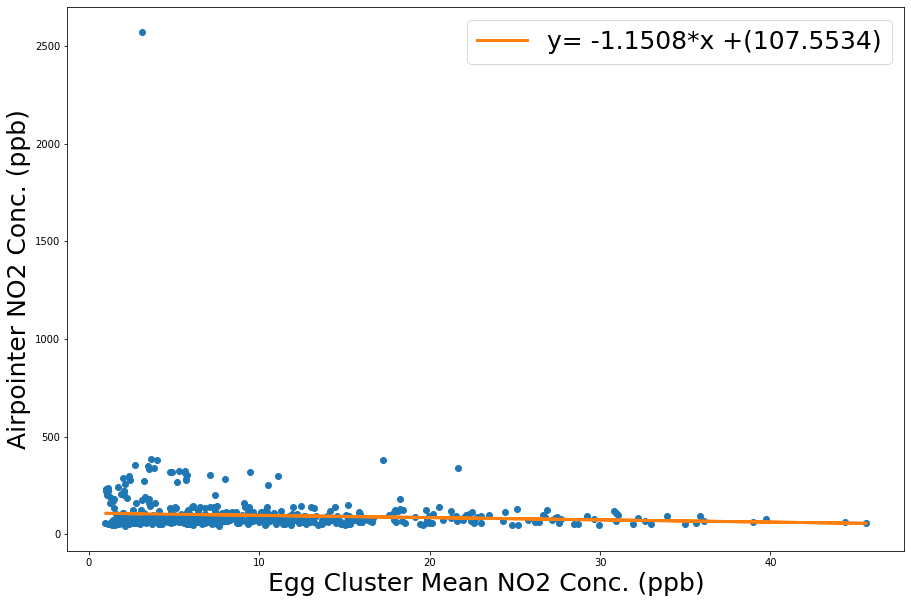

In [50]:
# Calculate a regression line
xValues = sensor_cluster['Airpointer_NO2[ppb]'].to_numpy()
yValues = sensor_cluster['NO2[ppb]'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

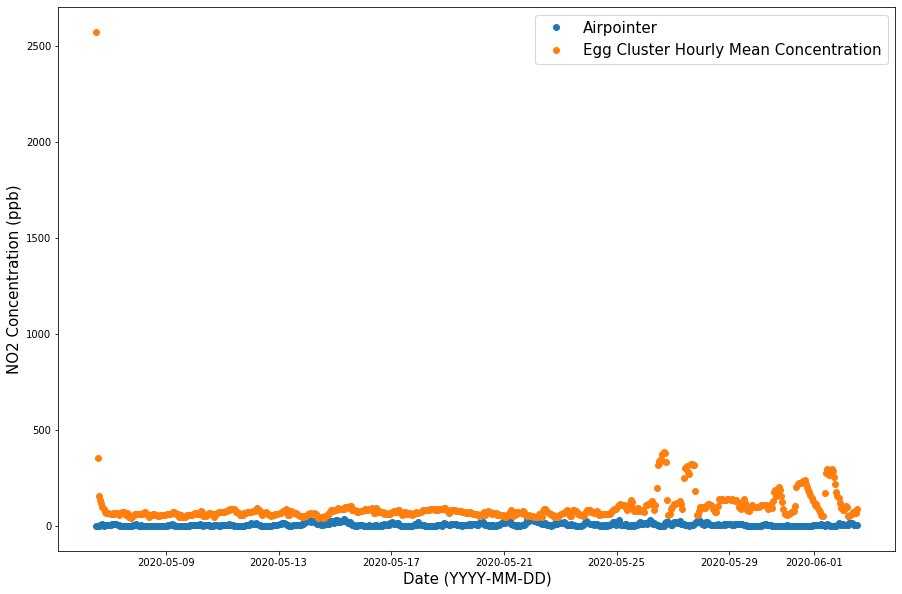

In [52]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(sensor_cluster.index.to_series(), sensor_cluster['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(sensor_cluster.index.to_series(), sensor_cluster['NO2[ppb]'], 'o',label="Egg Cluster Hourly Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

In [54]:
sensor_cluster

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 13:00:00,19.990000,22.908889,1.555556,2.222222,2.333333,142.283333,1.422313,2573.472222,1.405332,99264.800000,3.092333
2020-05-06 14:00:00,18.079124,24.662431,5.363942,6.640385,7.081677,58.415422,1.423892,354.630470,1.420346,99265.046635,2.711000
2020-05-06 15:00:00,22.104889,19.616056,1.189444,1.930556,2.090000,52.154389,1.424351,158.829056,1.421864,99188.698889,3.901500
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000,5.137333
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556,7.393667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.253500,55.292333,4.650000,6.663889,7.155000,43.241889,1.424222,72.902000,1.422267,99395.750556,12.394950
2020-06-02 10:00:00,19.055667,54.171833,10.448333,15.653889,17.139444,44.864389,1.424253,76.390000,1.422276,99298.217222,7.480200
2020-06-02 11:00:00,22.666278,46.194778,3.690556,5.188333,5.552778,43.138611,1.424584,74.345278,1.422459,99197.744444,6.709750


In [56]:
sensor_cluster.to_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/sensor_cluster_06Jun2020_hourly.pkl')

In [59]:
egg_2_4 = pd.concat((egg_2, egg_4))
egg_2_4 = egg_2_4.groupby(egg_2_4.index).mean()
egg_2_4

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 13:00:00,19.725000,24.305000,0.750000,1.500000,1.500000,142.275000,1.422648,2892.590000,1.402938,99266.250000,3.092333
2020-05-06 14:00:00,18.134519,24.615000,1.111538,1.998077,2.217308,55.643654,1.424299,400.426538,1.419446,99265.210577,2.711000
2020-05-06 15:00:00,21.982917,19.707750,0.947500,1.729167,1.897500,48.225250,1.424734,190.246333,1.421011,99188.726667,3.901500
2020-05-06 16:00:00,21.628167,19.348167,1.149167,2.002500,2.236667,48.434000,1.424704,174.688667,1.421089,99141.685833,5.137333
2020-05-06 17:00:00,21.518667,18.971083,1.468333,2.446667,2.685833,48.384667,1.424698,153.747667,1.421219,99112.908333,7.393667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,12.394950
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,7.480200
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,6.709750


In [60]:
# Remove the first 3 points from the dataset
egg_2_4 = egg_2_4.iloc[3:]
egg_2_4

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 16:00:00,21.628167,19.348167,1.149167,2.002500,2.236667,48.434000,1.424704,174.688667,1.421089,99141.685833,5.137333
2020-05-06 17:00:00,21.518667,18.971083,1.468333,2.446667,2.685833,48.384667,1.424698,153.747667,1.421219,99112.908333,7.393667
2020-05-06 18:00:00,18.747083,20.955833,1.805833,2.901667,3.180833,49.889000,1.424470,129.454083,1.421263,99125.303333,10.763833
2020-05-06 19:00:00,15.700083,24.534000,2.282500,3.502500,3.776667,49.877083,1.424250,113.269333,1.421238,99158.309167,3.808167
2020-05-06 20:00:00,14.179583,23.492250,0.740833,1.235833,1.378333,47.017667,1.424196,92.189333,1.421311,99216.016667,4.448667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,12.394950
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,7.480200
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,6.709750


0.0012672646756908268

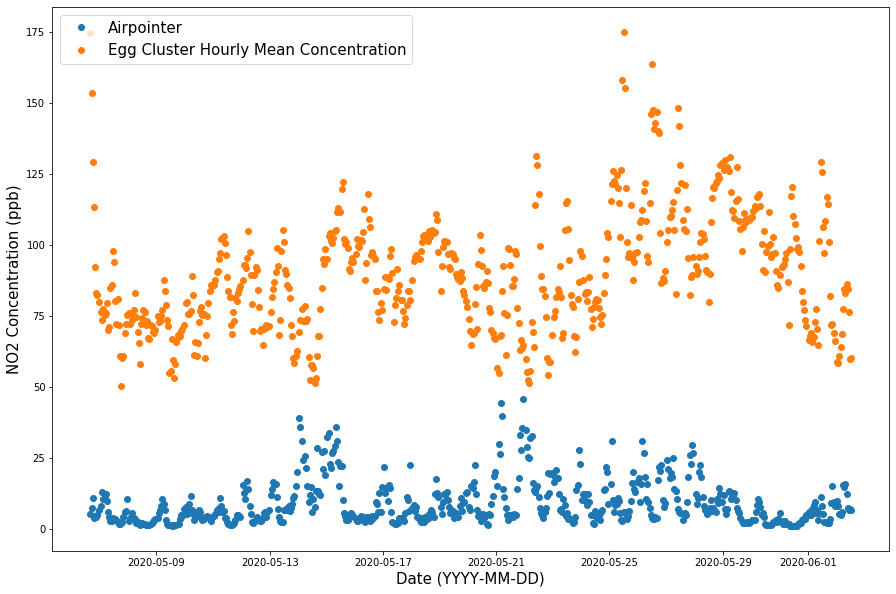

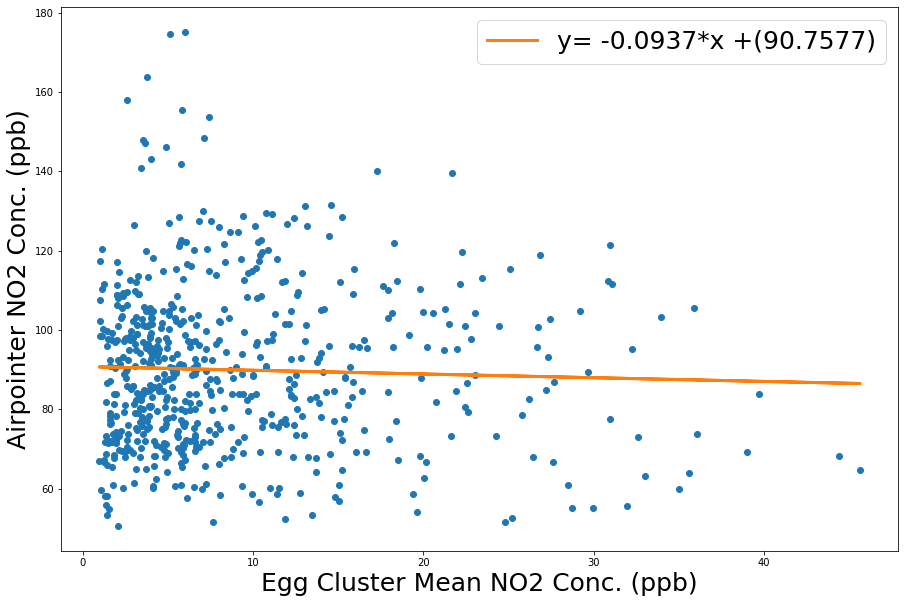

In [61]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(egg_2_4.index.to_series(), egg_2_4['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(egg_2_4.index.to_series(), egg_2_4['NO2[ppb]'], 'o',label="Egg Cluster Hourly Mean Concentration")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = egg_2_4['Airpointer_NO2[ppb]'].to_numpy()
yValues = egg_2_4['NO2[ppb]'].to_numpy()
# Calculate a regression line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('Egg Cluster Mean NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [62]:
DATA = egg_2_4.to_numpy()
target = DATA[:,10].reshape(-1,1)
DATA = np.delete(DATA, 10, 1)

In [63]:
# Split the data into training and test sets
DATA_train, DATA_test, target_train, target_test = train_test_split(DATA, target, random_state=0)
# Simple Linear Regression method
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(elastic_net.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(elastic_net.score(DATA_test, target_test)))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, elastic_net.predict(DATA))))
print('Estimator feature strengths: {}'.format(elastic_net.coef_))

Training set score: 0.398226
Test set score: 0.404853
MAE: 4.2298
Estimator feature strengths: [-0.04530145  0.0268674  -1.63569702  2.81289654 -1.01792876  0.13055826
 -0.         -0.08126883  0.          0.00297719]


In [64]:
egg_2_4

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 16:00:00,21.628167,19.348167,1.149167,2.002500,2.236667,48.434000,1.424704,174.688667,1.421089,99141.685833,5.137333
2020-05-06 17:00:00,21.518667,18.971083,1.468333,2.446667,2.685833,48.384667,1.424698,153.747667,1.421219,99112.908333,7.393667
2020-05-06 18:00:00,18.747083,20.955833,1.805833,2.901667,3.180833,49.889000,1.424470,129.454083,1.421263,99125.303333,10.763833
2020-05-06 19:00:00,15.700083,24.534000,2.282500,3.502500,3.776667,49.877083,1.424250,113.269333,1.421238,99158.309167,3.808167
2020-05-06 20:00:00,14.179583,23.492250,0.740833,1.235833,1.378333,47.017667,1.424196,92.189333,1.421311,99216.016667,4.448667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,12.394950
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,7.480200
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,6.709750


In [65]:
egg_2_4 = pd.concat((egg_2, egg_4))
egg_2_4 = egg_2_4.groupby(egg_2_4.index).mean()
egg_2_4

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 13:00:00,19.725000,24.305000,0.750000,1.500000,1.500000,142.275000,1.422648,2892.590000,1.402938,99266.250000,3.092333
2020-05-06 14:00:00,18.134519,24.615000,1.111538,1.998077,2.217308,55.643654,1.424299,400.426538,1.419446,99265.210577,2.711000
2020-05-06 15:00:00,21.982917,19.707750,0.947500,1.729167,1.897500,48.225250,1.424734,190.246333,1.421011,99188.726667,3.901500
2020-05-06 16:00:00,21.628167,19.348167,1.149167,2.002500,2.236667,48.434000,1.424704,174.688667,1.421089,99141.685833,5.137333
2020-05-06 17:00:00,21.518667,18.971083,1.468333,2.446667,2.685833,48.384667,1.424698,153.747667,1.421219,99112.908333,7.393667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,12.394950
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,7.480200
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,6.709750


In [66]:
egg_2_4.to_pickle('EGG#2_#4_06Jun2020_hourly.pkl')

In [69]:
egg_2_4.iloc[3:].to_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/EGG#2_#4_06Jun2020_hourly_without_initial_3_outliers.pkl')

In [72]:
dataframe = pd.read_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/EGG#2_#4_06Jun2020_hourly_without_initial_3_outliers.pkl')
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 16:00:00,21.628167,19.348167,1.149167,2.002500,2.236667,48.434000,1.424704,174.688667,1.421089,99141.685833,5.137333
2020-05-06 17:00:00,21.518667,18.971083,1.468333,2.446667,2.685833,48.384667,1.424698,153.747667,1.421219,99112.908333,7.393667
2020-05-06 18:00:00,18.747083,20.955833,1.805833,2.901667,3.180833,49.889000,1.424470,129.454083,1.421263,99125.303333,10.763833
2020-05-06 19:00:00,15.700083,24.534000,2.282500,3.502500,3.776667,49.877083,1.424250,113.269333,1.421238,99158.309167,3.808167
2020-05-06 20:00:00,14.179583,23.492250,0.740833,1.235833,1.378333,47.017667,1.424196,92.189333,1.421311,99216.016667,4.448667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.495583,54.554000,4.486667,6.513333,7.008333,43.480667,1.424575,86.360750,1.421546,99394.828333,12.394950
2020-06-02 10:00:00,19.250583,53.580500,9.369167,14.350833,15.655833,45.091333,1.424596,84.480000,1.421589,99296.669167,7.480200
2020-06-02 11:00:00,22.804000,45.862583,3.525000,5.054167,5.427500,43.152750,1.424899,76.461417,1.421809,99195.867500,6.709750


In [96]:
airpointer = pd.read_pickle('RAW_DATA_HOURLY/airpointer_06Jun2020_hourly.pkl')
airpointer = drop_values(airpointer, airpointer['NO2'], -1, 1)
airpointer = airpointer.iloc[3:]
airpointer

,NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,
2020-05-06 16:00:00,1.919000,5.137333,6.889833,40.594000,19.666000,15.035500,4.626500,12.851333,26.497000
2020-05-06 17:00:00,2.494167,7.393667,9.502500,39.201833,21.422167,16.256500,5.165667,12.170000,27.646167
2020-05-06 18:00:00,1.459167,10.763833,12.104500,35.107333,16.479000,11.466000,5.013333,11.409000,28.912333
2020-05-06 19:00:00,0.409500,3.808167,4.204333,38.284333,13.103500,9.678500,3.426167,10.577667,26.920333
2020-05-06 20:00:00,0.315500,4.448667,4.764667,36.122500,10.409333,7.162833,3.244000,9.082000,28.326833
...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,1.871583,12.394950,14.266483,35.526850,24.393067,14.080850,10.313250,991.866117,14.362150
2020-06-02 10:00:00,2.176050,7.480200,9.656100,44.714200,19.079400,13.009233,6.067050,991.048683,16.280417
2020-06-02 11:00:00,2.018567,6.709750,8.636333,48.688017,20.483817,13.730200,6.751233,990.149050,18.828600


In [88]:
# ------------------------ ALL OF THE MODEL'S PARAMETERS ------------------------
# Sensor measurements from the cluster
cluster_temp_inside_box = dataframe['Temperature[degC]'].to_numpy().reshape(-1,1)
cluster_humidity = dataframe['Humidity[percent]'].to_numpy().reshape(-1,1)
cluster_pm_1 = dataframe['PM1.0[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_pm_25 = dataframe['PM2.5[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_pm_10 = dataframe['PM10.0[ug/m^3]'].to_numpy().reshape(-1,1)
cluster_O3_conc = dataframe['O3[ppb]'].to_numpy().reshape(-1,1)
cluster_O3_vol = dataframe['O3[V]'].to_numpy().reshape(-1,1)
cluster_NO2_conc = dataframe['NO2[ppb]'].to_numpy().reshape(-1,1)
cluster_NO2_vol = dataframe['NO2[V]'].to_numpy().reshape(-1,1)
cluster_pressure = dataframe['Pressure[Pa]'].to_numpy().reshape(-1,1)
# Airpointer measurements
airpointer_NO = airpointer['NO'].to_numpy().reshape(-1,1)
airpointer_NO2 = dataframe['Airpointer_NO2[ppb]'].to_numpy().reshape(-1,1)
airpointer_NOx = airpointer['NOx'].to_numpy().reshape(-1,1)
airpointer_O3 = airpointer['O3'].to_numpy().reshape(-1,1)
airpointer_pm10_conc = airpointer['PM10_conc'].to_numpy().reshape(-1,1)
airpointer_pm10_25 = airpointer['PM10-2.5_conc'].to_numpy().reshape(-1,1)
airpointer_pm25 = airpointer['PM2.5_conc'].to_numpy().reshape(-1,1)
airpointer_air_temperature = airpointer['Air_Temperature'].to_numpy().reshape(-1,1)
airpointer_relative_humidity = airpointer['Relative_Humidity'].to_numpy().reshape(-1,1)

# Build the DATA matrix
DATA = np.concatenate((cluster_temp_inside_box, 
                       cluster_humidity, 
                       cluster_pm_1, 
                       cluster_pm_25, 
                       cluster_pm_10,
                       cluster_O3_conc,
                       cluster_O3_vol,
#                        cluster_NO2_conc,
#                        cluster_NO2_vol,
                       cluster_pressure,
#                        airpointer_NO,
#                        airpointer_NOx,
                       airpointer_O3,
                       airpointer_pm10_conc,
                       airpointer_pm10_25,
                       airpointer_pm25,
                       airpointer_air_temperature,
                       airpointer_relative_humidity), 
                       axis=1)
# The target vector
target = airpointer_NO2

In [89]:
# Split the data into training and test sets
DATA_train, DATA_test, target_train, target_test = train_test_split(DATA, target, random_state=0)
# Simple Linear Regression method
elastic_net = ElasticNet(alpha=0.001, max_iter=1000000).fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(elastic_net.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(elastic_net.score(DATA_test, target_test)))
print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, elastic_net.predict(DATA))))
print('Estimator feature strengths: {}'.format(elastic_net.coef_))

Training set score: 0.717805
Test set score: -1.305719
MAE: 3.4024
Estimator feature strengths: [-2.11933242e-01 -1.13563162e-01  1.10591041e-02  1.91536163e+00
 -1.59823045e+00  4.53191490e-01 -0.00000000e+00  1.78724738e-03
 -4.32437577e-01  3.45196379e-01 -0.00000000e+00  2.13342357e-01
  3.87519854e-03  3.21441452e-02]


0.41533210486932415

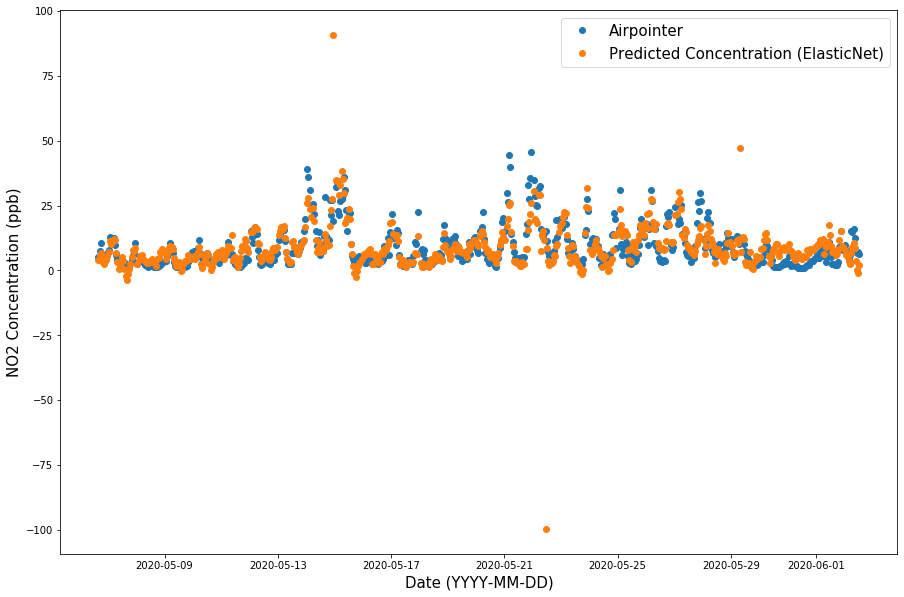

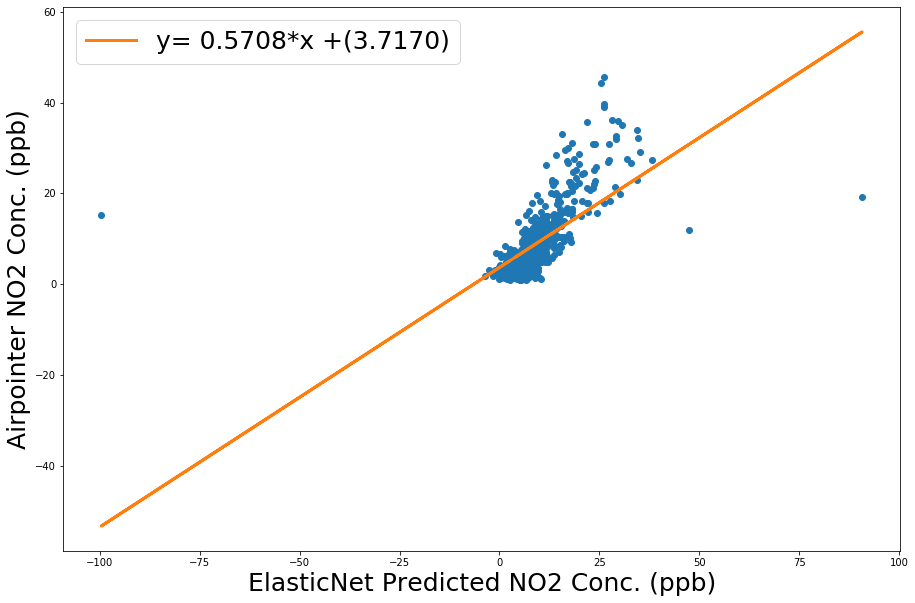

In [90]:
# Plot the time series graph
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Airpointer_NO2[ppb]'], 'o', label='Airpointer')
plt.plot(dataframe.index.to_series(), elastic_net.predict(DATA), 'o',label="Predicted Concentration (ElasticNet)")
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('NO2 Concentration (ppb)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
xValues = elastic_net.predict(DATA).reshape(-1,1)
yValues = target
linear_regression = LinearRegression().fit(xValues, yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0][0], linear_regression.intercept_[0]),
         linewidth=3)
plt.xlabel('ElasticNet Predicted NO2 Conc. (ppb)', fontsize=25)
plt.ylabel('Airpointer NO2 Conc. (ppb)', fontsize=25)
plt.legend(loc='best', fontsize=25)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))

In [102]:
egg_1 = pd.read_pickle('RAW_DATA_HOURLY/Egg#4_06Jun2020_hourly.pkl')
egg_1 = drop_values(egg_1, egg_1.index, '2020-05-25 15:00:00', 0)
egg_1.to_pickle('Egg#4_25May2020_hourly.pkl')
egg_1

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa]
Timestamp,,,,,,,,,,
2020-05-06 13:00:00,18.270000,25.340000,0.500000,1.500000,1.500000,152.030000,1.420438,3120.730000,1.408406,99240.700000
2020-05-06 14:00:00,17.968654,24.770577,1.019231,1.713462,1.861538,53.433654,1.422308,420.575385,1.424035,99233.907692
2020-05-06 15:00:00,22.392167,19.515833,0.860000,1.491667,1.601667,47.171833,1.422770,214.009333,1.425345,99153.841667
2020-05-06 16:00:00,22.319833,18.850500,1.110000,1.770000,1.896667,46.779333,1.422770,189.641833,1.425485,99105.393333
2020-05-06 17:00:00,22.198833,18.444833,1.400000,2.188333,2.283333,47.520667,1.422746,161.216000,1.425648,99076.631667
...,...,...,...,...,...,...,...,...,...,...
2020-05-25 11:00:00,40.230333,30.182333,4.986667,6.416667,6.576667,62.620167,1.424285,179.364333,1.426430,99684.003333
2020-05-25 12:00:00,40.380500,29.483667,8.281667,10.033333,10.190000,67.306833,1.424207,193.378500,1.426352,99679.410000
2020-05-25 13:00:00,37.531000,35.044000,10.338333,13.601667,13.891667,70.731667,1.423820,164.315833,1.426354,99667.500000


In [ ]:
egg_1 = pd.read_pickle('RAW_DATA_HOURLY/Egg#4_06Jun2020_hourly.pkl')
egg_1 = drop_values(egg_1, egg_1.index, '2020-05-25 15:00:00', 0)
egg_1.to_pickle('Egg#4_25May2020_hourly.pkl')
egg_1

In [5]:
egg_1 = pd.read_pickle('CLEANED_RAW_DATA_HOURLY_WITH_TARGET/sensor_cluster_06Jun2020_hourly.pkl')
egg_1

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],Airpointer_NO2[ppb]
Timestamp,,,,,,,,,,,
2020-05-06 13:00:00,19.990000,22.908889,1.555556,2.222222,2.333333,142.283333,1.422313,2573.472222,1.405332,99264.800000,3.092333
2020-05-06 14:00:00,18.079124,24.662431,5.363942,6.640385,7.081677,58.415422,1.423892,354.630470,1.420346,99265.046635,2.711000
2020-05-06 15:00:00,22.104889,19.616056,1.189444,1.930556,2.090000,52.154389,1.424351,158.829056,1.421864,99188.698889,3.901500
2020-05-06 16:00:00,21.898333,19.096778,1.161667,1.975000,2.187778,52.662000,1.424325,135.239611,1.422013,99140.480000,5.137333
2020-05-06 17:00:00,21.836278,18.678667,1.469444,2.380556,2.604444,53.213833,1.424310,118.911944,1.422118,99111.335556,7.393667
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 09:00:00,18.253500,55.292333,4.650000,6.663889,7.155000,43.241889,1.424222,72.902000,1.422267,99395.750556,12.394950
2020-06-02 10:00:00,19.055667,54.171833,10.448333,15.653889,17.139444,44.864389,1.424253,76.390000,1.422276,99298.217222,7.480200
2020-06-02 11:00:00,22.666278,46.194778,3.690556,5.188333,5.552778,43.138611,1.424584,74.345278,1.422459,99197.744444,6.709750
